### Predicting Diamond's Price

In this project, I try to make a linear model for predicting the diamond's price based on its carate, clarity, color, and cut. The data include more than 50,000 rows of data including the prices of diamonds with different color, clarity, cut, and carate and I split the model to include both training and testing population. Based on training population, I make a model and then test the model based on the testing population. Finally, I compare two regression models  

In [232]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 


In [231]:
# data are provided from https://www.kaggle.com/shivam2503/diamonds
cwd = os.getcwd()
dia = pd.read_csv(cwd + '\diamonds.csv', index_col = 0)

cut_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

dia ['color']= dia ['color'].map (color_dic)
dia ['clarity']= dia ['clarity'].map (clarity_dic)
dia ['cut']= dia ['cut'].map (cut_dic)

dia.dropna(inplace = True)

In [185]:
dia = sklearn.utils.shuffle(dia)

X = dia.drop('price',axis = 1).values
y = dia['price'].values

In [186]:
total_size = dia['price'].count()

In [187]:
test_size = round (0.005 * total_size)

In [188]:
X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

clf = svm.SVR(kernel = 'linear')
clf.fit(X_train,y_train)

SVR(kernel='linear')

In [137]:
clf.score (X_test,y_test)

0.8409318432711637

C:\Users\hamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-1119.6362935269844, 18276.0)

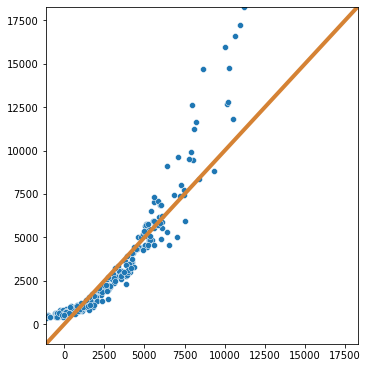

In [207]:
fig, ax = plt.subplots(figsize = (5,5), constrained_layout=True)
y_predict = []
for X, y in zip (X_test , y_test):
    y_predict.append(clf.predict ([X])[0])
sns.scatterplot(y_predict, y_test, ax = ax)
sns.lineplot([min(y_predict), max(y_test)],[min(y_predict), max(y_test)],ax=ax, linewidth = 4,color = '#d58234')
ax.set_xlim([min(y_predict), max(y_test)])
ax.set_ylim([min(y_predict), max(y_test)])

# it seems that the prediction is not appropriate for very cheap or very expensive dimanonds 

Model seems to have a better accuracy for diamonds in mid-range price but the accuracy for cheap and expensive diamonds is compromised. 
Now, let's compare this with Ensemble methods:

In [234]:
clf_rbf = svm.SVR(kernel = 'rbf')
clf_rbf.fit(X_train,y_train)

SVR()

C:\Users\hamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(2355.2384305297005, 18276.0)

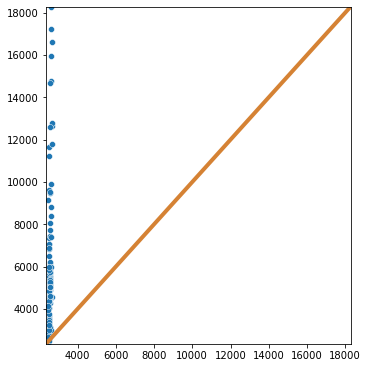

In [235]:
fig, ax = plt.subplots(figsize = (5,5), constrained_layout=True)
y_predict = []
for X, y in zip (X_test , y_test):
    y_predict.append(clf_rbf.predict ([X])[0])
sns.scatterplot(y_predict, y_test, ax = ax)
sns.lineplot([min(y_predict), max(y_test)],[min(y_predict), max(y_test)],ax=ax, linewidth = 4,color = '#d58234')
ax.set_xlim([min(y_predict), max(y_test)])
ax.set_ylim([min(y_predict), max(y_test)])

In [236]:
clf_rbf.score (X_test,y_test)

-0.012982655947288979

Therefore, a linear method provides a better estimations than ensemble menthods. 